### Aggregated space combat modelling

This paper - https://journals.sagepub.com/doi/10.1177/15485129211063369 - suggests ODEs can be used to model combat in space, and proposes models as an aide to decision makers.

In [1]:
clear;

function dydt = odefun(t,y,rB,rR,TB,TR)
    a=5000;
    rMoon=1731.1;
    V=(4/3)*pi*(a^3-rMoon^3); #volume around moon
    SB=(4/3)*pi*rB^3;
    SR=(4/3)*pi*rR^3;
    dydt(1) = -(y(1)*y(2)*SR)/(TB*y(1)*SR+V);
    dydt(2) = -(y(1)*y(2)*SB)/(TR*y(2)*SB+V);
end

In [2]:
function y_end = simulate_plot_brackney(rB,rR,TB,TR,B,R)

    tspan = [0 604800];
    % initial B and R
    y0 = [B R];
    [t, y] = ode45(@(t,y) odefun(t,y,rB,rR,TB,TR),tspan,y0,1);
    y_b = y(:,1);
    y_r = y(:,2);
    
    y_end=y(:,end);

    figure;
    plot(t,y_b,'b','LineWidth',3);
    hold on;
    plot(t,y_r,'r','LineWidth',3);
    legend({'Blue Force','Red Force'});
    xlabel('Time(s)')
    #xticklabels({'0','100000','200000','300000','400000','500000','600000'});
    ylabel('Number of Units(Blue and Red)')

end

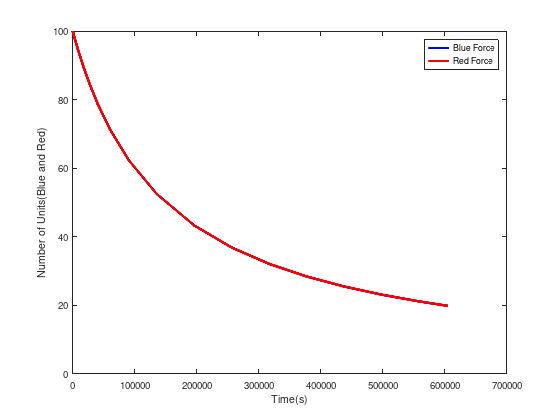

In [3]:
# Base case

B=100;
R=100;
rB=20;
rR=20;
TB=100;
TR=100;
simulate_plot_brackney(rB,rR,TB,TR,B,R);

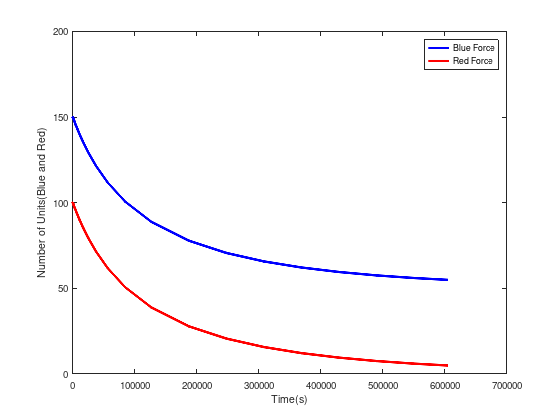

In [4]:
# Blue boosts numbers

B=150;
R=100;
rB=20;
rR=20;
TB=100;
TR=100;
simulate_plot_brackney(rB,rR,TB,TR,B,R);

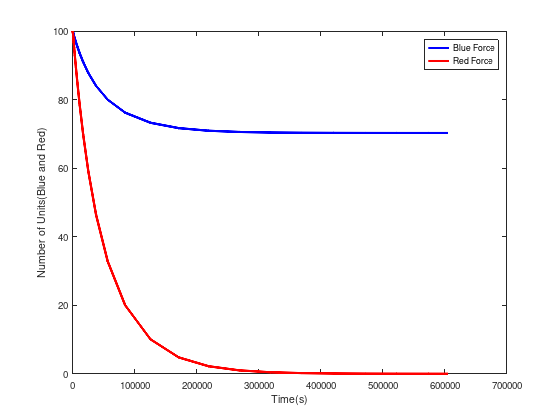

In [5]:
# Blue boosts sensor range

B=100;
R=100;
rB=30;
rR=20;
TB=100;
TR=100;
simulate_plot_brackney(rB,rR,TB,TR,B,R);

### Hybrid models using modified carrying capacity

Our group project modified the notion of carrying capacity to see if the Lotka-Volterra Hybrid model could be used to understand space combat.

Given a small enough space and a large enough number of ships, you would not only see inter-force competition but also intra-force competition. For example, in the absence of one force then what happens to the other? The other force might be slowed by friendly fire, competition for space etc.

In [235]:
clear;

# B, R are the numbers of robots for blue and red
# fB, fR are the fighting effectiveness of each side's robots
# pB, pR are protection (from friendly fire, guns, general space wear and tear)
# rB, rR reinforcement rate (growth)
# sB, sR are the area around the robots/drones that must be clear of friendly fire otherwise they get destroyed.

function dydt = odeHybrid(t,y,fB,fR,pB,pR,rB,rR,sB,sR)
    rMoon=1731.1;
    a=rMoon+1; # Let's keep volume close to moon surface ~1km
    V=(4/3)*pi*(a^3-rMoon^3); #volume around moon, not including moon
    B = y(1);
    R = y(2);
    battleSpace = 1/32; # How much of the moon's surface is in the battle
    kB = V/sB * pB * battleSpace; # To see the effect on a small number of forces, we should keep the battle space small, to simular friendly fire
    kR = V/sR * pR * battleSpace;
    dydt(1) = rB*B*(kB - B - fR*R)/kB; 
    dydt(2) = rR*R*(kR - R - fB*B)/kR;
end

In [236]:
function y_end = simulatePlotHybrid(fB,fR,pB,pR,rB,rR,sB,sR,B,R)

    tspan = [0 50];
    % initial B and R
    y0 = [B R];
    [t, y] = ode45(@(t,y) odeHybrid(t,y,fB,fR,pB,pR,rB,rR,sB,sR),tspan,y0,1);
    y_b = y(:,1);
    y_r = y(:,2);
    
    y_end=y(:,end);

    figure;
    plot(t,y_b,'b','LineWidth',3);
    hold on;
    plot(t,y_r,'r','LineWidth',3);
    legend({'Blue Force','Red Force'});
    xlabel('Time')
    ylabel('Number of Units(Blue and Red)')

end

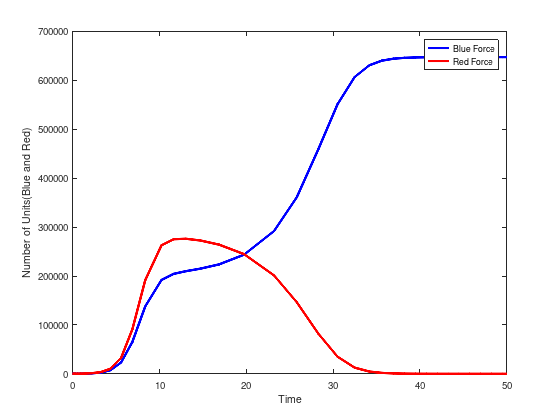

In [257]:
# The red team has more craft to start and has slightly better weapons, but the blue team has better protection
# There is a point where the red crowds itself out

B=100;
R=140;
rR=1;
rB=1;
fB=1.5;
fR=1.55;
pB=1.1;
pR=1;
sB=2;
sR=2;
simulatePlotHybrid(fB,fR,pB,pR,rB,rR,sB,sR,B,R);

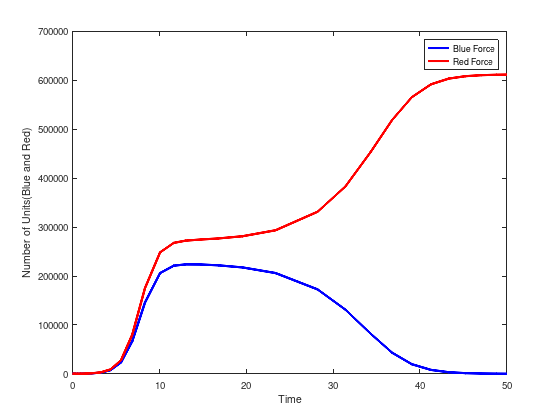

In [268]:
# The same scenario where red starts with fewer craft than last time, but has instead upgraded its protection very slightly

B=100;
R=120;
rR=1;
rB=1;
fB=1.5;
fR=1.55;
pB=1.1;
pR=1.04;
sB=2;
sR=2;
simulatePlotHybrid(fB,fR,pB,pR,rB,rR,sB,sR,B,R);

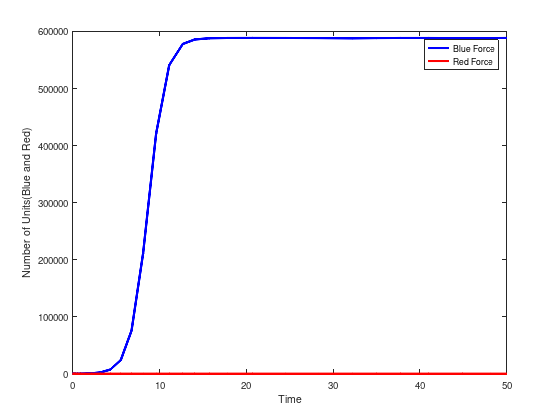

In [260]:
# In the absence of an enemy a force still experiences logistic growth.
# There must be some factor apart from friendly fire. EG space wear and tear.

B=100;
R=0;
rR=1;
rB=1;
fB=1.5;
fR=1.5;
pB=1;
pR=1;
sB=2;
sR=2;
simulatePlotHybrid(fB,fR,pB,pR,rB,rR,sB,sR,B,R);